In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,20)


In [2]:
#upload data
df = pd.read_excel('REdata.xlsx')


In [3]:
#check data
df.shape

(993, 4)

In [4]:
df.isnull().sum()

Subtitle values    0
Price, EUR         0
Number of rooms    0
Size (m²)          0
dtype: int64

In [5]:
df.describe()

,"Price, EUR",Number of rooms,Size (m²)
count,993.000000,993.000000,993.000000
mean,139931.326284,2.419436,60.692568
std,79476.207939,1.100566,30.598882
min,25850.000000,0.500000,16.000000
25%,89600.000000,1.500000,40.000000
50%,121200.000000,2.500000,55.000000
75%,168000.000000,3.000000,72.000000
max,754490.000000,5.000000,274.000000


In [6]:
df['Price per m², EUR'] = df['Price, EUR']/df['Size (m²)']
df['Price per m², EUR'] = df['Price per m², EUR'].round(2)

In [7]:
df.describe()

,"Price, EUR",Number of rooms,Size (m²),"Price per m², EUR"
count,993.000000,993.000000,993.000000,993.000000
mean,139931.326284,2.419436,60.692568,2346.486616
std,79476.207939,1.100566,30.598882,535.930406
min,25850.000000,0.500000,16.000000,972.970000
25%,89600.000000,1.500000,40.000000,1952.630000
50%,121200.000000,2.500000,55.000000,2350.730000
75%,168000.000000,3.000000,72.000000,2641.940000
max,754490.000000,5.000000,274.000000,4929.580000


In [8]:

# Function to detect outliers using z-score
numerical_columns = ['Price, EUR', 'Number of rooms', 'Size (m²)', 'Price per m², EUR']


def detect_outliers_z_score(data: pd.DataFrame, threshold=3):
    outliers = []
    for col in data.columns:
        if col in numerical_columns:
            z_scores = (data[col] - data[col].mean()) / data[col].std()
            outlier_indices = np.abs(z_scores) > threshold
            outliers.extend(data.index[outlier_indices].tolist())
    return list(set(outliers))

# Function to remove outliers from DataFrame
def remove_outliers(data, outliers):
    cleaned_data = data.drop(outliers)
    return cleaned_data

# Detect outliers in the DataFrame
outliers = detect_outliers_z_score(df)

if outliers:
    df = remove_outliers(df,outliers)
    print(f'{len(outliers)} outliers were detected. Outliers have been removed')
else:
    print('No outliers have been detected')




23 outliers were detected. Outliers have been removed


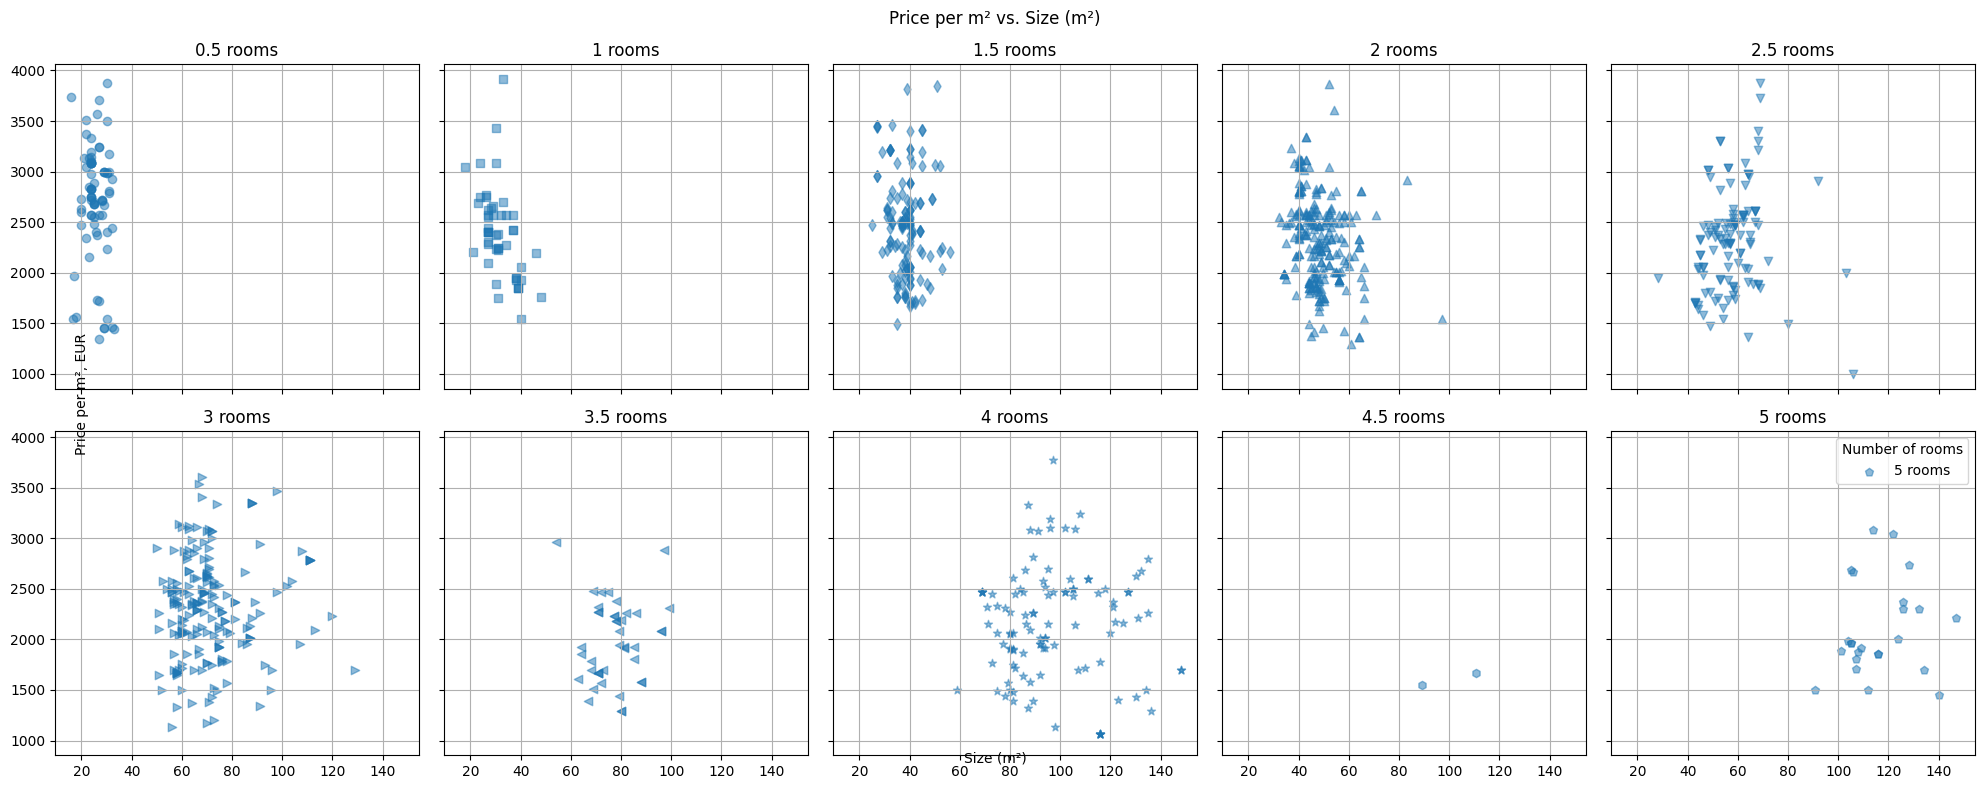

In [11]:
 # Create a scatter plot

marker_styles = {0.5: 'o', 1: 's', 1.5: 'd', 2: '^', 2.5: 'v', 3: '>', 3.5: '<', 4: '*', 4.5: 'h', 5: 'p'}

fig, axs = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)

for i, room_num in enumerate([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]):
    room_df = df[df['Number of rooms'] == room_num]
    ax = axs.flat[i]
    ax.scatter(room_df['Size (m²)'], room_df['Price per m², EUR'], label=f'{room_num} rooms',
                marker=marker_styles[room_num], alpha=0.5)
    ax.set_title(f'{room_num} rooms')
fig.suptitle('Price per m² vs. Size (m²)')
fig.text(0.5, 0.04, 'Size (m²)', ha='center')
fig.text(0.04, 0.5, 'Price per m², EUR', va='center', rotation='vertical')
axs.flat[-1].legend(title='Number of rooms')
for ax in axs.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()
